In [1]:
import pandas as pd

In [2]:
invoices = pd.read_csv('https://raw.githubusercontent.com/FBosler/you-datascientist/master/invoices.csv')

In [3]:
invoices.head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469.0,Breakfast,False
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],22.0,Dinner,False
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],314.0,Lunch,False
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],438.0,Dinner,False
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,False


##  Data Types and Conversions

###  Available data types
    - object : This data type is used for strings (i.e., sequences of characters)
    - int64 : Used for integers (whole numbers, no decimals)
    - float64 : Used for floating-point numbers (i.e., figures with decimals/fractions)
    - bool : Used for values that can only be True/False
    - datetime64 : Used for date and time values
    - timedelta : Used to represent the difference between datetimes
    - category : The category data type in pandas is a hybrid data type. It looks and behaves like a string in many instances but internally is represented by an array of integers. This allows the data to be sorted in a custom order and to more efficiently store the data.

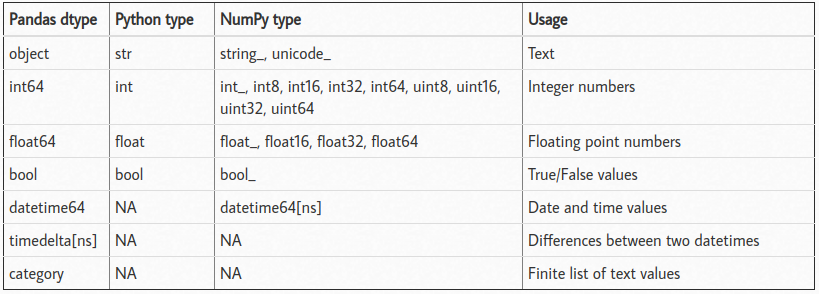

In [5]:
from IPython.display import Image

Image(filename='resources//Screenshot from 2020-02-03 22-59-05.png') 

## Converting Data Types

- There are two standard ways of converting pandas data types:
    - <column>.astype(<desired type>)
    - conversion helper functions, like pd.to_numeric or pd.to_datetime

### astype
- astype is quick and works well with clean data and when the conversion is straight forward, e.g., from int64 to float64 (or vice versa).
- astype has to be called directly on the column that you want to convert.

In [4]:
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50017 entries, 0 to 50016
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order Id           50017 non-null  object 
 1   Date               50017 non-null  object 
 2   Meal Id            50017 non-null  object 
 3   Company Id         50017 non-null  object 
 4   Date of Meal       50017 non-null  object 
 5   Participants       50017 non-null  object 
 6   Meal Price         50017 non-null  float64
 7   Type of Meal       50017 non-null  object 
 8   Heroes Adjustment  50017 non-null  bool   
dtypes: bool(1), float64(1), object(7)
memory usage: 3.1+ MB


In [5]:
invoices['Type of Meal'] = invoices['Type of Meal'].astype('category')
invoices['Date'] = invoices['Date'].astype('datetime64')
invoices['Meal Price'] = invoices['Meal Price'].astype('int')

In [6]:
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50017 entries, 0 to 50016
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order Id           50017 non-null  object        
 1   Date               50017 non-null  datetime64[ns]
 2   Meal Id            50017 non-null  object        
 3   Company Id         50017 non-null  object        
 4   Date of Meal       50017 non-null  object        
 5   Participants       50017 non-null  object        
 6   Meal Price         50017 non-null  int32         
 7   Type of Meal       50017 non-null  category      
 8   Heroes Adjustment  50017 non-null  bool          
dtypes: bool(1), category(1), datetime64[ns](1), int32(1), object(5)
memory usage: 2.6+ MB


In [7]:
invoices.dtypes

Order Id                     object
Date                 datetime64[ns]
Meal Id                      object
Company Id                   object
Date of Meal                 object
Participants                 object
Meal Price                    int32
Type of Meal               category
Heroes Adjustment              bool
dtype: object

### conversion helper functions

- There are three pd.to_<some_type> functions, but for me, only two of them come up frequently:
    - pd.to_numeric()
    - pd.to_datetime()
    - pd.to_timedelta() (I can’t remember if I’ve ever used this one, to be honest)
    
    
    
- Their main advantage over astype, is that it is possible to specify the behavior in case a value is encountered, that can not be converted.

- Both functions accept an additional parameter errors that defines how errors should be treated. 
- We could choose to ignore errors by passingerrors='ignore' , or turn the offending values into np.nan values by passing errors='coerce'. 
- The default behavior is to raise errors.

#### pd.to_numeric

In [8]:
invoices.loc[45612,'Meal Price'] = 'I am causing trouble'
invoices.loc[35612,'Meal Price'] = 'Me too'

In [9]:
invoices['Meal Price'].apply(lambda x: type(x)).value_counts()

<class 'int'>    50015
<class 'str'>        2
Name: Meal Price, dtype: int64

In [10]:
invoices['Meal Price'][invoices['Meal Price'].apply(lambda x: isinstance(x,str))]

35612                  Me too
45612    I am causing trouble
Name: Meal Price, dtype: object

In [11]:
# convert the offending values into np.nan
invoices['Meal Price'] = pd.to_numeric(invoices['Meal Price'],errors='coerce')
# fill np.nan with the median of the data
invoices['Meal Price'] = invoices['Meal Price'].fillna(invoices['Meal Price'].median())
# convert the column into integer
invoices['Meal Price'].astype(int)

0        469
1         22
2        314
3        438
4        690
        ... 
50012      9
50013     25
50014    160
50015    497
50016    365
Name: Meal Price, Length: 50017, dtype: int32

#### pd.to_datetime()

In [12]:
print(pd.to_datetime('2019-8-1'))
print(pd.to_datetime('2019/8/1'))
print(pd.to_datetime('8/1/2019'))
print(pd.to_datetime('Aug, 1 2019'))
print(pd.to_datetime('Aug - 1 2019'))
print(pd.to_datetime('August - 1 2019'))
print(pd.to_datetime('2019, August - 1'))
print(pd.to_datetime('20190108'))

2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00
2019-01-08 00:00:00


- pd.to_datetime('20190108',format='%Y%d%m')

In [13]:
invoices['Date of Meal'] = pd.to_datetime(invoices['Date of Meal'], utc=True)

In [14]:
invoices.head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 05:00:00+00:00,['David Bishop'],469.0,Breakfast,False
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 18:00:00+00:00,['David Bishop'],22.0,Dinner,False
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 12:00:00+00:00,['Karen Stansell'],314.0,Lunch,False
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 19:00:00+00:00,['Addie Patino'],438.0,Dinner,False
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 12:00:00+00:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,False


## Useful accessor methods for certain data types

- There are three different accessors:
    - dt
    - str
    
- All of the methods are accessed by calling .<accessor>.method on the column of choice, like this: invoices['Date of Meal'].dt.date

### Accessor — dt

- date (returns the date of the datetime value)

In [28]:
invoices['Date of Meal'].dt.date

0        2016-05-31
1        2018-10-01
2        2014-08-23
3        2014-04-07
4        2015-07-27
            ...    
50012    2017-09-21
50013    2018-03-18
50014    2017-09-22
50015    2018-02-01
50016    2017-09-09
Name: Date of Meal, Length: 50017, dtype: object

In [32]:
invoices['Date of Meal'].dt.day_name()

0         Tuesday
1          Monday
2        Saturday
3          Monday
4          Monday
           ...   
50012    Thursday
50013      Sunday
50014      Friday
50015    Thursday
50016    Saturday
Name: Date of Meal, Length: 50017, dtype: object

In [30]:
invoices['Date of Meal'].dt.month_name()

0              May
1          October
2           August
3            April
4             July
           ...    
50012    September
50013        March
50014    September
50015     February
50016    September
Name: Date of Meal, Length: 50017, dtype: object

- days_in_month
- nanosecond,microsecond,second,minute,hour ,day, week, month, quarter, year gets the integer of the corresponding frequency.

In [30]:
invoices['Date of Meal'].dt.days_in_month

0        31
1        31
2        31
3        30
4        31
         ..
50012    30
50013    31
50014    30
50015    28
50016    30
Name: Date of Meal, Length: 50017, dtype: int64

- is_leap_year, is_month_start, is_month_end, is_quarter_start, is_quarter_end, is_year_start, is_year_end returns True or False respectively for each value

In [31]:
invoices['Date of Meal'].dt.is_month_end

0         True
1        False
2        False
3        False
4        False
         ...  
50012    False
50013    False
50014    False
50015    False
50016    False
Name: Date of Meal, Length: 50017, dtype: bool

- to_pydatetime(), which converts the Pandas datetime into a regular Python datetime format (which you might need sometimes) and to_period(<PERIOD>) [available periods are W, M, Q, and Y], which converts the dates into periods.

In [32]:
invoices['Date of Meal'].dt.to_pydatetime()

array([datetime.datetime(2016, 5, 31, 5, 0, tzinfo=<UTC>),
       datetime.datetime(2018, 10, 1, 18, 0, tzinfo=<UTC>),
       datetime.datetime(2014, 8, 23, 12, 0, tzinfo=<UTC>), ...,
       datetime.datetime(2017, 9, 22, 19, 0, tzinfo=<UTC>),
       datetime.datetime(2018, 2, 1, 20, 0, tzinfo=<UTC>),
       datetime.datetime(2017, 9, 9, 12, 0, tzinfo=<UTC>)], dtype=object)

In [33]:
invoices['Date of Meal'].dt.to_period('W')

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\pandas\core\arrays\datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


0        2016-05-30/2016-06-05
1        2018-10-01/2018-10-07
2        2014-08-18/2014-08-24
3        2014-04-07/2014-04-13
4        2015-07-27/2015-08-02
                 ...          
50012    2017-09-18/2017-09-24
50013    2018-03-12/2018-03-18
50014    2017-09-18/2017-09-24
50015    2018-01-29/2018-02-04
50016    2017-09-04/2017-09-10
Name: Date of Meal, Length: 50017, dtype: period[W-SUN]

### Accessor — str

- lower() / upper() to manage capitalization of strings

In [34]:
invoices['Type of Meal'].str.lower()
invoices['Type of Meal'].str.upper()

0        BREAKFAST
1           DINNER
2            LUNCH
3           DINNER
4            LUNCH
           ...    
50012    BREAKFAST
50013    BREAKFAST
50014       DINNER
50015       DINNER
50016        LUNCH
Name: Type of Meal, Length: 50017, dtype: object

- ljust(width), rjust(width), center(width), zfill(width) to control the positioning of strings. All of them take a total width of the desired resulting string as an input. ljust, rjust, and center fill the difference to the desired length with whitespaces.zfill adds that many leading zeroes. ljustis left-bound, rjustis right-bound.

In [35]:
invoices['Type of Meal'].str.rjust(width=25)
invoices['Type of Meal'].str.rjust(width=15)
invoices['Type of Meal'].str.center(width=15)
invoices['Type of Meal'].str.zfill(width=15)


0        000000Breakfast
1        000000000Dinner
2        0000000000Lunch
3        000000000Dinner
4        0000000000Lunch
              ...       
50012    000000Breakfast
50013    000000Breakfast
50014    000000000Dinner
50015    000000000Dinner
50016    0000000000Lunch
Name: Type of Meal, Length: 50017, dtype: object

- startswith(<substring>), endswith(<substring>), contains(<substring>) checks for the presence of a substring

In [36]:
invoices['Type of Meal'].str.endswith('ast')


0         True
1        False
2        False
3        False
4        False
         ...  
50012     True
50013     True
50014    False
50015    False
50016    False
Name: Type of Meal, Length: 50017, dtype: bool

- swapcase(), repeat(times) for kicks and giggles

In [37]:
invoices['Type of Meal'].str.swapcase()

0        bREAKFAST
1           dINNER
2            lUNCH
3           dINNER
4            lUNCH
           ...    
50012    bREAKFAST
50013    bREAKFAST
50014       dINNER
50015       dINNER
50016        lUNCH
Name: Type of Meal, Length: 50017, dtype: object

In [38]:
invoices['Type of Meal'].str.repeat(2)


0        BreakfastBreakfast
1              DinnerDinner
2                LunchLunch
3              DinnerDinner
4                LunchLunch
                ...        
50012    BreakfastBreakfast
50013    BreakfastBreakfast
50014          DinnerDinner
50015          DinnerDinner
50016            LunchLunch
Name: Type of Meal, Length: 50017, dtype: object

### Accessor — cat

- cat provides access to a couple of categorial operations

In [22]:
invoices['Type of Meal']

0        Breakfast
1           Dinner
2            Lunch
3           Dinner
4            Lunch
           ...    
50012    Breakfast
50013    Breakfast
50014       Dinner
50015       Dinner
50016        Lunch
Name: Type of Meal, Length: 50017, dtype: category
Categories (3, object): ['Breakfast', 'Dinner', 'Lunch']

In [18]:
# ordered lets you know if the column is ordered
invoices['Type of Meal'].cat.ordered

False

In [24]:
# Sorting and order
s = pd.Series(pd.Categorical(["a", "b", "c", "a"], ordered=False))
s.sort_values(inplace=True)


In [25]:
s

0    a
3    a
1    b
2    c
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [26]:
s.cat.as_ordered()


0    a
3    a
1    b
2    c
dtype: category
Categories (3, object): ['a' < 'b' < 'c']

In [27]:
s.cat.as_unordered()


0    a
3    a
1    b
2    c
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [19]:
#categories to return the categories
invoices['Type of Meal'].cat.categories

Index(['Breakfast', 'Dinner', 'Lunch'], dtype='object')

In [20]:
#codes for quick conversion of the category into its numerical representation
invoices['Type of Meal'].cat.codes

0        0
1        1
2        2
3        1
4        2
        ..
50012    0
50013    0
50014    1
50015    1
50016    2
Length: 50017, dtype: int8

In [21]:
# reorder_categories to change the existing order of the categories
invoices['Type of Meal'].cat.reorder_categories(
    ['Lunch','Breakfast','Dinner']
)

0        Breakfast
1           Dinner
2            Lunch
3           Dinner
4            Lunch
           ...    
50012    Breakfast
50013    Breakfast
50014       Dinner
50015       Dinner
50016        Lunch
Name: Type of Meal, Length: 50017, dtype: category
Categories (3, object): ['Lunch', 'Breakfast', 'Dinner']

- **Do not assume you need to convert all categorical data** to the pandas category data type.
- If **the data set starts to approach an appreciable percentage of your useable memory**, then consider using categorical data types.
- If you have **very significant performance concerns with operations that are executed frequently, look at using categorical data.**
- If you are using categorical data, add some checks to **make sure the data is clean and complete before converting to the pandas category type**. Additionally, **check for NaN values** after combining or converting dataframes.

## Combining DataFrames

### Concatenating

- data vertically (i.e., stack the data on top of each other) or 
- horizontally (i.e., stack the data next to each other).

- pd.concat takes a couple of optional parameters next to the list of DataFrames that you call concat on:
    - axis : 0 for vertical, 1 for horizontal. axis defaults to 0
    - join : 'inner' for the intersection, 'outer' for the union of indices of the non-concatenating axis. When we use axis=0 and join='inner' we will consider only overlapping columns. When using axis=1 and join='inner' we consider only overlapping indices. In the case of outer non-overlapping columns/indices will be filled with nan values. join defaults to outer
    - ignore_index : True to ignore preexisting indices and instead use labels from 0 to n-1 for the resulting DataFrame. ignore_index defaults to False
    - keys : If we provide a list (has to be the same length as the number of DataFrames) a hierarchical index will be constructed. keys defaults to None. Use keys for example, to add the source of the data. Best used in combination with names.
    - names : Assuming that you provide keys, the names will be used to label the resulting hierarchical index. names defaults to None.

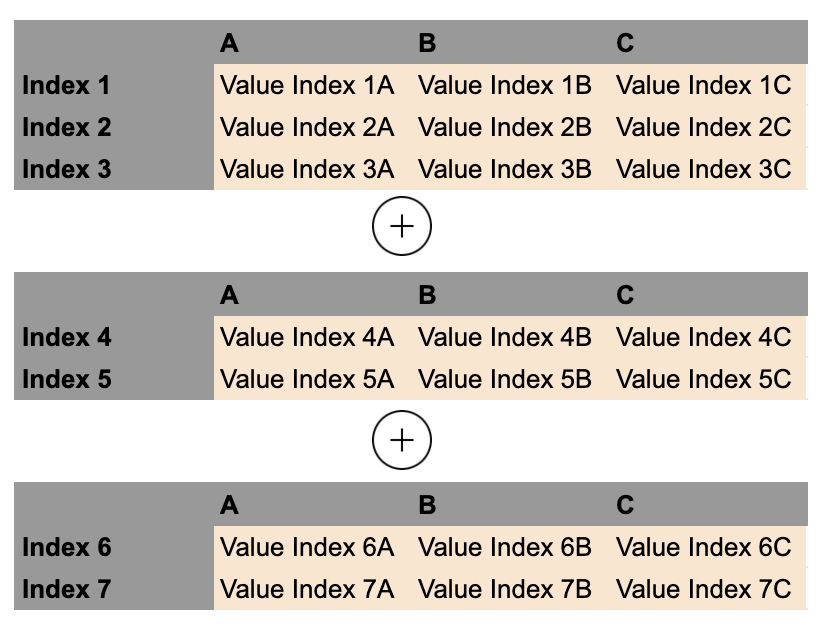

In [44]:
from IPython.display import Image

Image(filename='resources//vertically_stack.png') 

In [45]:
# Use dt accessor to count all the years

print(invoices['Date of Meal'].dt.year.value_counts().sort_index())
# Split the data 
y_2013 = invoices[invoices['Date of Meal'].dt.year == 2013].copy()
y_2014 = invoices[invoices['Date of Meal'].dt.year == 2014].copy()
y_2015 = invoices[invoices['Date of Meal'].dt.year == 2015].copy()
y_2016 = invoices[invoices['Date of Meal'].dt.year == 2016].copy()
y_2017 = invoices[invoices['Date of Meal'].dt.year == 2017].copy()
y_2018 = invoices[invoices['Date of Meal'].dt.year == 2018].copy()
y_2019 = invoices[invoices['Date of Meal'].dt.year == 2019].copy()

2013       34
2014    10051
2015    10036
2016     9862
2017     9921
2018    10095
2019       18
Name: Date of Meal, dtype: int64


In [46]:
pd.concat([y_2013,y_2014,y_2015,y_2016,y_2017,y_2018,y_2019])

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
1449,HH1CUKNKIIK87D4L,2014-01-03,M4QG9N01E25U3A53,N4BN0GG5XKZV113C,2013-12-31 21:00:00+00:00,['Jason Cuevas'],546.0,Dinner,False
4256,KFXTYDP0YG9C6AZF,2014-01-03,RUMIZCB9KM3N57BN,9FOCJR50GUHXT2S0,2013-12-31 12:00:00+00:00,['Robert Hairfield' 'Ray Dowty' 'Adam Bowers' ...,586.0,Lunch,False
4747,D5NR6EP8NQZ0TGW6,2014-01-05,5GDXSLG0F4WA3JEZ,RJ1NLTCTP1COK3YS,2013-12-31 21:00:00+00:00,['Leta Stevens'],549.0,Dinner,False
5097,2T71YISMHMPBKE3Z,2014-01-03,0C7DIKEPG5KXNRFR,R835HX2AVB1KJJL0,2013-12-30 19:00:00+00:00,['Hunter Marquez'],338.0,Dinner,False
5154,V226RP8DLAQQKU51,2014-01-04,6C9WDEPC4Q05WBSR,23B3R2N3LSYQJQMF,2013-12-30 13:00:00+00:00,['Erin Jones' 'Blake Newman' 'John Truett' 'Go...,377.0,Lunch,False
...,...,...,...,...,...,...,...,...,...
33833,IVSKD45PB8FZ0DRT,2018-12-31,6M3DK5ZNSTNHD50B,EIX79KCQQWJKLP21,2019-01-04 08:00:00+00:00,['Bob Fulton' 'Jermaine Rawls'],388.0,Breakfast,False
35406,IASPC12JU67ANTA5,2018-12-29,0MJH7DMFHIPI2T81,90KJEJUQ6MQO6NEW,2019-01-02 11:00:00+00:00,['Ted Pickering'],285.0,Lunch,False
36958,0GNFQ2XTTI56QE1E,2018-12-30,9UPI7YU9WQDSBR1P,9IPX1GTNSJJOULSB,2019-01-03 11:00:00+00:00,['John Hightower' 'Adam Hill' 'Betty Sagen'],600.0,Lunch,False
43534,8YHA5UTWAT7BOC24,2018-12-31,041RWJS7KUFPFVV9,Z19C6Y8F5Q22DMFK,2019-01-03 07:00:00+00:00,['Marva Cormier' 'Amy Boothe'],377.0,Breakfast,False


In [47]:
pd.concat([y_2013,y_2014,y_2015,y_2016,y_2017,y_2018,y_2019],keys=[13,14,15,16,17,18,19]).tail(50)

Order Id       Date           Meal Id        Company Id  \
18 49846  L2FKFMSS38HLB01A 2018-12-24  BOM4SK74TONIULMV  6V8H50ZNLMAF7UNC   
   49849  13MX623FMS4N6HX9 2018-10-30  GC561LRPNE8IHVZ7  6V8H50ZNLMAF7UNC   
   49867  0C40IGCYNJUOXEW4 2018-09-23  QQ9LET7P1TZZB3NY  3OE3X93CX3TNVHLA   
   49871  2HUEN5YYO5GTTRZB 2018-12-09  AEKMZ1245RD8CAZB  3OE3X93CX3TNVHLA   
   49872  M86IVU1KTTREIN5L 2018-03-27  CVJX8VY40V46NID4  3OE3X93CX3TNVHLA   
   49880  6JQ0SZ9BYLVYCCBS 2018-07-04  4NMJZ9AIBV94O2P6  HWSNBW4VK5EB51WJ   
   49881  J79GRH6DRWD1FM3G 2018-09-06  G0247JDOLUVLSDDU  HWSNBW4VK5EB51WJ   
   49886  HIWH9D43ZVXZK0UV 2018-04-06  E9HPF137PBO8Z4WP  CZTLKWWDEHQ0GW0I   
   49901  8YB6RG1YWJWP1WU6 2018-01-04  WC4A93447PVITQRN  CZTLKWWDEHQ0GW0I   
   49904  Q2R4R42DJKRLRP7S 2018-06-21  OQE96RP4EC8DWM1P  PLGXGQY1FMR95OBC   
   49911  1GZLB9NSCBM7U8QJ 2018-01-06  HBHTBLVYI9QV5TSU  PLGXGQY1FMR95OBC   
   49915  QYKCMPCP9WQ56ZA4 2018-04-11  W7E4RDUKEA7QG52E  8YOY0UK6SVPKGWDV   
   49917  PS47D4CIC4ND0IO5 2018-04-03  6YX35HODY6XK627N  8YOY0UK6SVPKGWDV   
   49923  SABLOCNYPRQ8R94G 2018-01-12  O8M470ANNQO0YD63  DNAC0XNVYCD3J62R   
   49927  AICZ5PCGDMFEXMX0 2018-06-25  59A74QG7098LEPQI  DNAC0XNVYCD3J62R   
   49928  GJAYV9J7BZL53162 2018-07-02  MJ82X2V9R1IEWD9K  DNAC0XNVYCD3J62R   
   49933  YD1KKIXM1UQAUCHE 2018-12-29  1OHQL5J1IA4LG415  P005KZN9HKO1TQK4   
   49934  BBCDO8U1LQKNG8H9 2018-11-28  UGG09HWXZUX59BB5  P005KZN9HKO1TQK4   
   49944  3DYZA7PIUJR121JO 2018-07-13  LGJF1B9H8A3AW48P  RSBI0DYL6TW6ONC2   
   49955  KONFX2N4WH3C5HL8 2018-05-14  MHBROCR5CCKWPNGU  RSBI0DYL6TW6ONC2   
   49956  TZIOJQZ9K3FUESZ0 2018-02-03  V7T1EIGVBR1Q56NH  RSBI0DYL6TW6ONC2   
   49969  YTPGKD59045CEVWU 2018-05-25  P2ZZPHFI5DLDRKT1  41AQ4K1NC4FVCGKJ   
   49971  J3LE0N5BOAIUS0W5 2018-10-13  DQQZL4WSYJCVQOOP  41AQ4K1NC4FVCGKJ   
   49973  QYAGIC1MD49E7PKQ 2018-04-25  4TMGDUNLCMBYOKS4  4JW3GG4YW52M86F5   
   49983  NNET5BV06VRKMFAH 2018-03-16  T4NYT08JJ363GSYG  R0KV9HJ7RIRRYSVG   
   49985  MWSMD6U0JR1OHPIR 2018-09-08  5LSTGLVAV5I5A1PQ  R0KV9HJ7RIRRYSVG   
   49990  W9UQE6OG3X7LRH3N 2018-04-10  DGNUNDE9W27FQ971  R0KV9HJ7RIRRYSVG   
   49991  CGPOTR0XW6FDEQQ1 2018-12-24  8K07A0E1NNRYG9OG  5K17HYJQ6JG6UFU0   
   49999  JOPTZ9VYV1RWPTW7 2018-02-01  I5EXQPTV5PK8PC3C  5K17HYJQ6JG6UFU0   
   50011  81J2RM0YM63VAT0K 2018-06-03  HNXSJZQ120WGAWZP  E4K99D4JR9E40VE1   
   50013  RR0VKJN8V0KHNKGG 2018-03-19  22EX9VZSJKHP4AIP  E4K99D4JR9E40VE1   
   50015  QHEUIYNC0XQX7GDR 2018-01-28  4U0VH2TGQL30X23X  E4K99D4JR9E40VE1   
19 1122   SVKO4MFVVCJ2IO7R 2018-12-29  DLHZCS3TGWJECP7J  I7AWOJEL8XF2I3CO   
   3308   YHZZ6A53NLZWMGWH 2018-12-30  ELTPN1FFIKNZ9C8Q  JG15WM9203FQ315X   
   5015   G6P11M7CH9Y95NZQ 2018-12-31  OUKKE42OL17Q6QZJ  FFO6UGOKSNVR8MFO   
   7268   O3SJZ5MPWHV69FZW 2018-12-30  39QKKF9TWULEO8HH  6RLVMXBQDTQXPJAT   
   8320   SR1IPX1E2DPR5TQF 2018-12-29  PBB5QC2UNRYLMC61  BJQESLTT3W3790WI   
   10940  I8USYS7DPQKTPM3H 2018-12-31  6E1515IUTFYUH4WR  FOZUB96D4RT1CZBZ   
   14119  VR1RS2PNZUGQ9IBN 2018-12-28  LIKB70J6SHF8QQ27  K0PJ5AIJV0WFCZ3D   
   15564  UIDZ4EF22PKA6C6O 2018-12-31  N9F1N6SK0022V65X  4YYGSHKOLDMGL5JV   
   15653  XQ52ETWZRBOW5T5L 2018-12-28  IN3PTGK3II5U3JQD  N5K5Y7C6F3BY36FK   
   17250  SUI9U7W44ZN20HD1 2018-12-30  2AXR70OG53ZG5KU9  5EII44XY6W4119X4   
   21886  JL40FO3FGP2XZG37 2018-12-30  KWB811LA3G12NGBJ  8RCMS5IGT0H13X96   
   22633  C0JUOJIY8230CY4C 2018-12-30  IZR5HWXGW3TP12WI  IU5IVY4G90GVWCZM   
   27605  3HUAW5O21OKGX3R8 2018-12-31  SSVCMZ58VFOLH50X  8ZOXQEP85XA8V57V   
   33833  IVSKD45PB8FZ0DRT 2018-12-31  6M3DK5ZNSTNHD50B  EIX79KCQQWJKLP21   
   35406  IASPC12JU67ANTA5 2018-12-29  0MJH7DMFHIPI2T81  90KJEJUQ6MQO6NEW   
   36958  0GNFQ2XTTI56QE1E 2018-12-30  9UPI7YU9WQDSBR1P  9IPX1GTNSJJOULSB   
   43534  8YHA5UTWAT7BOC24 2018-12-31  041RWJS7KUFPFVV9  Z19C6Y8F5Q22DMFK   
   48207  J5FBQ0JWGIKWFSCO 2018-12-30  V8HPYOK6H6W5C5WQ  5AI9YF2ROZIV8QPJ   

                      Date of Meal  \
18 49846 2018-12-25 19:00:00+00:00   
   49849 2018-

In [48]:
d1 = {"Name": ["Pankaj", "Lisa"], "ID": [1, 2]}
d2 = {"Name": "David", "ID": 3}

df1 = pd.DataFrame(d1, index={1, 2})
df2 = pd.DataFrame(d2, index={3})

df3 = pd.concat([df1, df2], keys=["DF1", "DF2"])
print('********\n', df3)

********
          Name  ID
DF1 1  Pankaj   1
    2    Lisa   2
DF2 3   David   3


In [49]:
df1.head()

,Name,ID
1,Pankaj,1
2,Lisa,2


In [50]:
df2.head()

,Name,ID
3,David,3


In [51]:
pd.concat([y_2013,y_2014,y_2015,y_2016,y_2017,y_2018,y_2019],keys=[13,14,15,16,17,18,19],names=['year','original_index']).tail(50)

Order Id       Date           Meal Id  \
year original_index                                                  
18   49846           L2FKFMSS38HLB01A 2018-12-24  BOM4SK74TONIULMV   
     49849           13MX623FMS4N6HX9 2018-10-30  GC561LRPNE8IHVZ7   
     49867           0C40IGCYNJUOXEW4 2018-09-23  QQ9LET7P1TZZB3NY   
     49871           2HUEN5YYO5GTTRZB 2018-12-09  AEKMZ1245RD8CAZB   
     49872           M86IVU1KTTREIN5L 2018-03-27  CVJX8VY40V46NID4   
     49880           6JQ0SZ9BYLVYCCBS 2018-07-04  4NMJZ9AIBV94O2P6   
     49881           J79GRH6DRWD1FM3G 2018-09-06  G0247JDOLUVLSDDU   
     49886           HIWH9D43ZVXZK0UV 2018-04-06  E9HPF137PBO8Z4WP   
     49901           8YB6RG1YWJWP1WU6 2018-01-04  WC4A93447PVITQRN   
     49904           Q2R4R42DJKRLRP7S 2018-06-21  OQE96RP4EC8DWM1P   
     49911           1GZLB9NSCBM7U8QJ 2018-01-06  HBHTBLVYI9QV5TSU   
     49915           QYKCMPCP9WQ56ZA4 2018-04-11  W7E4RDUKEA7QG52E   
     49917           PS47D4CIC4ND0IO5 2018-04-03  6YX35HODY6XK627N   
     49923           SABLOCNYPRQ8R94G 2018-01-12  O8M470ANNQO0YD63   
     49927           AICZ5PCGDMFEXMX0 2018-06-25  59A74QG7098LEPQI   
     49928           GJAYV9J7BZL53162 2018-07-02  MJ82X2V9R1IEWD9K   
     49933           YD1KKIXM1UQAUCHE 2018-12-29  1OHQL5J1IA4LG415   
     49934           BBCDO8U1LQKNG8H9 2018-11-28  UGG09HWXZUX59BB5   
     49944           3DYZA7PIUJR121JO 2018-07-13  LGJF1B9H8A3AW48P   
     49955           KONFX2N4WH3C5HL8 2018-05-14  MHBROCR5CCKWPNGU   
     49956           TZIOJQZ9K3FUESZ0 2018-02-03  V7T1EIGVBR1Q56NH   
     49969           YTPGKD59045CEVWU 2018-05-25  P2ZZPHFI5DLDRKT1   
     49971           J3LE0N5BOAIUS0W5 2018-10-13  DQQZL4WSYJCVQOOP   
     49973           QYAGIC1MD49E7PKQ 2018-04-25  4TMGDUNLCMBYOKS4   
     49983           NNET5BV06VRKMFAH 2018-03-16  T4NYT08JJ363GSYG   
     49985           MWSMD6U0JR1OHPIR 2018-09-08  5LSTGLVAV5I5A1PQ   
     49990           W9UQE6OG3X7LRH3N 2018-04-10  DGNUNDE9W27FQ971   
     49991           CGPOTR0XW6FDEQQ1 2018-12-24  8K07A0E1NNRYG9OG   
     49999           JOPTZ9VYV1RWPTW7 2018-02-01  I5EXQPTV5PK8PC3C   
     50011           81J2RM0YM63VAT0K 2018-06-03  HNXSJZQ120WGAWZP   
     50013           RR0VKJN8V0KHNKGG 2018-03-19  22EX9VZSJKHP4AIP   
     50015           QHEUIYNC0XQX7GDR 2018-01-28  4U0VH2TGQL30X23X   
19   1122            SVKO4MFVVCJ2IO7R 2018-12-29  DLHZCS3TGWJECP7J   
     3308            YHZZ6A53NLZWMGWH 2018-12-30  ELTPN1FFIKNZ9C8Q   
     5015            G6P11M7CH9Y95NZQ 2018-12-31  OUKKE42OL17Q6QZJ   
     7268            O3SJZ5MPWHV69FZW 2018-12-30  39QKKF9TWULEO8HH   
     8320            SR1IPX1E2DPR5TQF 2018-12-29  PBB5QC2UNRYLMC61   
     10940           I8USYS7DPQKTPM3H 2018-12-31  6E1515IUTFYUH4WR   
     14119           VR1RS2PNZUGQ9IBN 2018-12-28  LIKB70J6SHF8QQ27   
     15564           UIDZ4EF22PKA6C6O 2018-12-31  N9F1N6SK0022V65X   
     15653           XQ52ETWZRBOW5T5L 2018-12-28  IN3PTGK3II5U3JQD   
     17250           SUI9U7W44ZN20HD1 2018-12-30  2AXR70OG53ZG5KU9   
     21886           JL40FO3FGP2XZG37 2018-12-30  KWB811LA3G12NGBJ   
     22633           C0JUOJIY8230CY4C 2018-12-30  IZR5HWXGW3TP12WI   
     27605           3HUAW5O21OKGX3R8 2018-12-31  SSVCMZ58VFOLH50X   
     33833           IVSKD45PB8FZ0DRT 2018-12-31  6M3DK5ZNSTNHD50B   
     35406           IASPC12JU67ANTA5 2018-12-29  0MJH7DMFHIPI2T81   
     36958           0GNFQ2XTTI56QE1E 2018-12-30  9UPI7YU9WQDSBR1P   
     43534           8YHA5UTWAT7BOC24 2018-12-31  041RWJS7KUFPFVV9   
     48207           J5FBQ0JWGIKWFSCO 2018-12-30  V8HPYOK6H6W5C5WQ   

                           Company Id              Date of Meal  \
year original_index                                               
18   49846           6V8H50ZNLMAF7UNC 2018-12-25 19:00:00+00:00   
     49849           6V8H50ZNLMAF7UNC 2018-10-28 13:00:00+00:00   
     49867           3OE3X93CX3TNVHLA 2018-09-25 06:00:00+00:00   
     49871           3OE3X93CX3TNVHLA 2018-12-07 07:0

### Concatenating — Horizontal Stacking

A use case for horizontal stacking is a case where you have multiple time series with overlapping but not identical indices. In which case, you wouldn’t want to end up with a DataFrame with potentially thousands of columns, but much rather a DataFrame with thousands of rows.

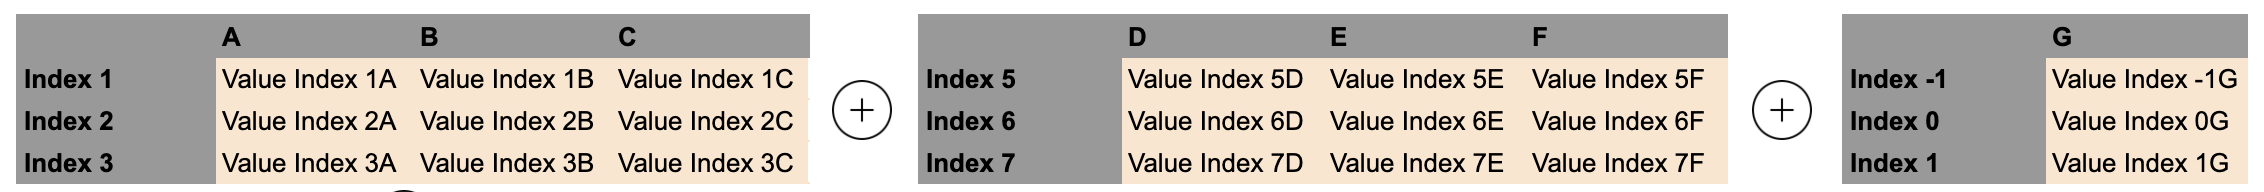

In [52]:
from IPython.display import Image

Image(filename='resources//1_p3kHYY_BgoyA3q4FPCJacg.png') 

In [55]:
import datetime
range_a = pd.date_range(
    datetime.datetime(2019,1,2),
    datetime.datetime(2019,1,8)
)
df_a = pd.DataFrame(
    index=range_a, 
    data=np.random.randint(2,10,size=len(range_a)),
    columns=['observations_A']
)
print(df_a.head())
range_b = pd.date_range(
    datetime.date(2019,1,5),
    datetime.date(2019,1,12)
)
df_b = pd.DataFrame(
    index=range_b, 
    data=np.random.randint(2,10,size=len(range_b)),
    columns=['observations_B']
)
print(df_b.head())
pd.concat([df_a,df_b],axis=1)

            observations_A
2019-01-02               6
2019-01-03               8
2019-01-04               9
2019-01-05               9
2019-01-06               6
            observations_B
2019-01-05               4
2019-01-06               4
2019-01-07               3
2019-01-08               6
2019-01-09               3


,observations_A,observations_B
2019-01-02,6.0,NaN
2019-01-03,8.0,NaN
2019-01-04,9.0,NaN
2019-01-05,9.0,4.0
2019-01-06,6.0,4.0
2019-01-07,3.0,3.0
2019-01-08,7.0,6.0
2019-01-09,NaN,3.0
2019-01-10,NaN,9.0
2019-01-11,NaN,2.0


In [56]:
import datetime
import numpy as np

- use concat against append

## Merging

> pd.merge(
 left, 
 right, 
 how='inner', 
 on=None, 
 left_on=None, 
 right_on=None,         
 left_index=False,
 right_index=False, 
 sort=True,
 suffixes=('_x', '_y'), 
 copy=True, 
 indicator=False,
 validate=None
)

- left/right : the left, respectively right, DataFrame you want to merge
- how : 'left', 'right', 'outer', 'inner'. how defaults to 'inner'.

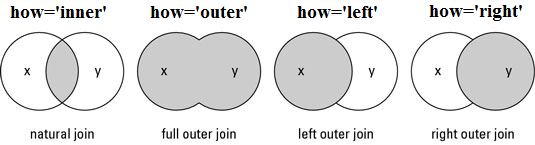

In [57]:
from IPython.display import Image

Image(filename='resources//merge.png') 

- left_index/right_index : If True, use the index from the left/right DataFrame to merge on. left_index/right_index defaults to False
- on : Column name(s) to merge on. Column name(s) have to exist in both the left and right DataFrame. If not passed and left_index and right_index are False, the intersection of the columns in both DataFrames will be inferred to join on.
- left_on/right_on : Column name(s) from the left/right DataFrame to join on. Typical use case: Keys you are joining on are differently labeled in your DataFrames. E.g., what is location_id in your left DataFrame, might be _id in your right DataFrame. In this case, you would do left_on='location_id', right_on='_id' .
- suffixes: A tuple of string suffixes to apply to overlapping columns. suffixes defaults to ('_x', '_y'). I like to use ('_base', '_joined').

In [33]:
import pandas as pd
# Load some additional Data
order_data = pd.read_csv('https://raw.githubusercontent.com/FBosler/you-datascientist/master/order_leads.csv', parse_dates=[3])
# Note the parse_dates? We need this to have consistent types with invoices, otherwise the subsequent merges would throw errors
sales_team = pd.read_csv('https://raw.githubusercontent.com/FBosler/you-datascientist/master/sales_team.csv')

In [34]:
order_data.head()

,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2017-02-18,4875,1
1,TLEXR1HZWTUTBHPB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-30,8425,0
2,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0
3,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0
4,5T4LGH4XGBWOD49Z,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-01-14,983,0


In [35]:
sales_team.head()

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,Jessie Mcallister,97UNNAT790E0WM4N,Chimera-Chasing Casbah,LJKS5NK6788CYMUU
1,Jessie Mcallister,97UNNAT790E0WM4N,Tangential Sheds,36MFTZOYMTAJP1RK
2,Jessie Mcallister,97UNNAT790E0WM4N,Two-Mile Grab,H3JRC7XX7WJAD4ZO
3,Jessie Mcallister,97UNNAT790E0WM4N,Three-Men-And-A-Helper Congo'S,HB25MDZR0MGCQUGX
4,Jessie Mcallister,97UNNAT790E0WM4N,Biophysical Battleground,7RVA8TIVBLBXMNO4


In [61]:
invoices.head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 05:00:00+00:00,['David Bishop'],469.0,Breakfast,False
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 18:00:00+00:00,['David Bishop'],22.0,Dinner,False
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 12:00:00+00:00,['Karen Stansell'],314.0,Lunch,False
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 19:00:00+00:00,['Addie Patino'],438.0,Dinner,False
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 12:00:00+00:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,False


### Merging — how

- No parameters provided: All parameters will use their defaults.The merge is going to be an inner merge (equivalent to how='inner').

In [62]:
pd.merge(order_data,invoices)

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Meal Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0,INBUX904GIHI8YBD,2016-05-31 05:00:00+00:00,['David Bishop'],469.0,Breakfast,False
1,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0,J0MMOOPP709DIDIE,2018-10-01 18:00:00+00:00,['David Bishop'],22.0,Dinner,False
2,041ORQM5OIHTIU6L,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-08-24,4185,0,E4UJLQNCI16UX5CS,2014-08-23 12:00:00+00:00,['Karen Stansell'],314.0,Lunch,False
3,YT796QI18WNGZ7ZJ,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-04-12,5839,0,C9SDFHF7553BE247,2014-04-07 19:00:00+00:00,['Addie Patino'],438.0,Dinner,False
4,6YLROQT27B6HRF4E,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-28,8841,0,48EQXS6IHYNZDDZ5,2015-07-27 12:00:00+00:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,False
...,...,...,...,...,...,...,...,...,...,...,...,...
50012,4OMS8ZSA0UX8LHWI,E4K99D4JR9E40VE1,Fierce Productivity,2017-09-20,110,0,1TD5MROATV1NHZ4Y,2017-09-21 06:00:00+00:00,['Regina Shirley'],9.0,Breakfast,False
50013,RR0VKJN8V0KHNKGG,E4K99D4JR9E40VE1,Fierce Productivity,2018-03-19,356,0,22EX9VZSJKHP4AIP,2018-03-18 08:00:00+00:00,['Robin Ramos' 'Chester Mortimer'],25.0,Breakfast,False
50014,STJ6QJC30WPRM93H,E4K99D4JR9E40VE1,Fierce Productivity,2017-09-21,2228,1,LMX18PNGWCIMG1QW,2017-09-22 19:00:00+00:00,['Robin Ramos'],160.0,Dinner,False
50015,QHEUIYNC0XQX7GDR,E4K99D4JR9E40VE1,Fierce Productivity,2018-01-28,8869,0,4U0VH2TGQL30X23X,2018-02-01 20:00:00+00:00,['Chester Mortimer' 'Robin Ramos'],497.0,Dinner,False


- how='left' : Again, the merge is based on all common columns. Suffixes are not relevant as all common columns will be used to merge on, so there will no be duplicated columns remaining.
However, this time around, we merge with how='left' which means that we will take all rows from the left frame and only add data from the right frame where we find some.

In [63]:
pd.merge(order_data,invoices,how='left').head()

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Meal Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2017-02-18,4875,1,NaN,NaT,NaN,NaN,NaN,NaN
1,TLEXR1HZWTUTBHPB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-30,8425,0,NaN,NaT,NaN,NaN,NaN,NaN
2,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0,INBUX904GIHI8YBD,2016-05-31 05:00:00+00:00,['David Bishop'],469.0,Breakfast,False
3,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0,J0MMOOPP709DIDIE,2018-10-01 18:00:00+00:00,['David Bishop'],22.0,Dinner,False
4,5T4LGH4XGBWOD49Z,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-01-14,983,0,NaN,NaT,NaN,NaN,NaN,NaN


- how='right' which means that we will take all rows from the right frame and only add data from the left frame where we find some.

In [64]:
pd.merge(order_data,invoices,how='right').head()

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Meal Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0,INBUX904GIHI8YBD,2016-05-31 05:00:00+00:00,['David Bishop'],469.0,Breakfast,False
1,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0,J0MMOOPP709DIDIE,2018-10-01 18:00:00+00:00,['David Bishop'],22.0,Dinner,False
2,041ORQM5OIHTIU6L,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-08-24,4185,0,E4UJLQNCI16UX5CS,2014-08-23 12:00:00+00:00,['Karen Stansell'],314.0,Lunch,False
3,YT796QI18WNGZ7ZJ,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-04-12,5839,0,C9SDFHF7553BE247,2014-04-07 19:00:00+00:00,['Addie Patino'],438.0,Dinner,False
4,6YLROQT27B6HRF4E,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-28,8841,0,48EQXS6IHYNZDDZ5,2015-07-27 12:00:00+00:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,False


In [65]:
pd.merge(order_data,invoices,how='outer').head() ## same as union

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Meal Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2017-02-18,4875,1,NaN,NaT,NaN,NaN,NaN,NaN
1,TLEXR1HZWTUTBHPB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-30,8425,0,NaN,NaT,NaN,NaN,NaN,NaN
2,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0,INBUX904GIHI8YBD,2016-05-31 05:00:00+00:00,['David Bishop'],469.0,Breakfast,False
3,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0,J0MMOOPP709DIDIE,2018-10-01 18:00:00+00:00,['David Bishop'],22.0,Dinner,False
4,5T4LGH4XGBWOD49Z,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-01-14,983,0,NaN,NaT,NaN,NaN,NaN,NaN


### Merging — on/suffixes

In [66]:
pd.merge(order_data,invoices,on='Order Id').head()

,Order Id,Company Id_x,Company Name,Date_x,Order Value,Converted,Date_y,Meal Id,Company Id_y,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 05:00:00+00:00,['David Bishop'],469.0,Breakfast,False
1,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 18:00:00+00:00,['David Bishop'],22.0,Dinner,False
2,041ORQM5OIHTIU6L,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-08-24,4185,0,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 12:00:00+00:00,['Karen Stansell'],314.0,Lunch,False
3,YT796QI18WNGZ7ZJ,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-04-12,5839,0,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 19:00:00+00:00,['Addie Patino'],438.0,Dinner,False
4,6YLROQT27B6HRF4E,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-28,8841,0,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 12:00:00+00:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,False


In [67]:
pd.merge(order_data,invoices,on='Order Id',suffixes=('_base','_join'))

,Order Id,Company Id_base,Company Name,Date_base,Order Value,Converted,Date_join,Meal Id,Company Id_join,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 05:00:00+00:00,['David Bishop'],469.0,Breakfast,False
1,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 18:00:00+00:00,['David Bishop'],22.0,Dinner,False
2,041ORQM5OIHTIU6L,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-08-24,4185,0,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 12:00:00+00:00,['Karen Stansell'],314.0,Lunch,False
3,YT796QI18WNGZ7ZJ,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-04-12,5839,0,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 19:00:00+00:00,['Addie Patino'],438.0,Dinner,False
4,6YLROQT27B6HRF4E,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-28,8841,0,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 12:00:00+00:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50012,4OMS8ZSA0UX8LHWI,E4K99D4JR9E40VE1,Fierce Productivity,2017-09-20,110,0,2017-09-20,1TD5MROATV1NHZ4Y,E4K99D4JR9E40VE1,2017-09-21 06:00:00+00:00,['Regina Shirley'],9.0,Breakfast,False
50013,RR0VKJN8V0KHNKGG,E4K99D4JR9E40VE1,Fierce Productivity,2018-03-19,356,0,2018-03-19,22EX9VZSJKHP4AIP,E4K99D4JR9E40VE1,2018-03-18 08:00:00+00:00,['Robin Ramos' 'Chester Mortimer'],25.0,Breakfast,False
50014,STJ6QJC30WPRM93H,E4K99D4JR9E40VE1,Fierce Productivity,2017-09-21,2228,1,2017-09-21,LMX18PNGWCIMG1QW,E4K99D4JR9E40VE1,2017-09-22 19:00:00+00:00,['Robin Ramos'],160.0,Dinner,False
50015,QHEUIYNC0XQX7GDR,E4K99D4JR9E40VE1,Fierce Productivity,2018-01-28,8869,0,2018-01-28,4U0VH2TGQL30X23X,E4K99D4JR9E40VE1,2018-02-01 20:00:00+00:00,['Chester Mortimer' 'Robin Ramos'],497.0,Dinner,False


- Note on Join :
    - join vs merge. join by default merges on the index of both DataFrames. Don't use join as it is just a special case of mergeand does not provide a benefit over merging.

## Map

In [36]:
look_up = sales_team.set_index('Company Name')['Sales Rep']
look_up.head()

Company Name
Chimera-Chasing Casbah            Jessie Mcallister
Tangential Sheds                  Jessie Mcallister
Two-Mile Grab                     Jessie Mcallister
Three-Men-And-A-Helper Congo'S    Jessie Mcallister
Biophysical Battleground          Jessie Mcallister
Name: Sales Rep, dtype: object

In [37]:
order_data['Sales Rep'] = order_data['Company Name'].map(look_up)

In [39]:
order_data.head()

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Sales Rep
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2017-02-18,4875,1,Jessie Mcallister
1,TLEXR1HZWTUTBHPB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-30,8425,0,Jessie Mcallister
2,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0,Jessie Mcallister
3,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0,Jessie Mcallister
4,5T4LGH4XGBWOD49Z,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-01-14,983,0,Jessie Mcallister


- Summary of combining DataFrames:
    - Use pd.concat to “stack” multiple DataFrame on top or next to each other. By default, **the stacking is vertical.** To overwrite the default use axis=1. By default, stack will carry over all columns/indices. To limit to common columns/indices use join='inner'.
    - **Do not use pd.DataFrame.append** as it is only a special, limited case of pd.concat and will only make your code less standardized and less coherent. Instead, use pd.concat.
    - Use pd.merge to combine information from two DataFrames. Merge defaults to an inner join and will infer the columns to merge on from the largest subset of common columns across the DataFrames.
    - Do not use pd.DataFrame.join as it is only a special, limited case of pd.merge and will only make your code less standardized and less coherent. Instead, use pd.merge.
    - Use pd.Series.map as a lookup-esque kind of functionality to get the value for a specific index/key from a series/dictionary.

## Reshaping DataFrames

### Transpose
- Transposing a DataFrame means to swap the index and column. 
- In other words, you are rotating the DataFrame around the origin. 
- Transposing does not change the content of the DataFrame.
- The DataFrame only changes the orientation.

In [40]:
invoices.head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 05:00:00+00:00,['David Bishop'],469.0,Breakfast,False
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 18:00:00+00:00,['David Bishop'],22.0,Dinner,False
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 12:00:00+00:00,['Karen Stansell'],314.0,Lunch,False
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 19:00:00+00:00,['Addie Patino'],438.0,Dinner,False
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 12:00:00+00:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,False


In [41]:
invoices.head().T

,0,1,2,3,4
Order Id,839FKFW2LLX4LMBB,97OX39BGVMHODLJM,041ORQM5OIHTIU6L,YT796QI18WNGZ7ZJ,6YLROQT27B6HRF4E
Date,2016-05-27 00:00:00,2018-09-27 00:00:00,2014-08-24 00:00:00,2014-04-12 00:00:00,2015-07-28 00:00:00
Meal Id,INBUX904GIHI8YBD,J0MMOOPP709DIDIE,E4UJLQNCI16UX5CS,C9SDFHF7553BE247,48EQXS6IHYNZDDZ5
Company Id,LJKS5NK6788CYMUU,LJKS5NK6788CYMUU,LJKS5NK6788CYMUU,LJKS5NK6788CYMUU,LJKS5NK6788CYMUU
Date of Meal,2016-05-31 05:00:00+00:00,2018-10-01 18:00:00+00:00,2014-08-23 12:00:00+00:00,2014-04-07 19:00:00+00:00,2015-07-27 12:00:00+00:00
Participants,['David Bishop'],['David Bishop'],['Karen Stansell'],['Addie Patino'],['Addie Patino' 'Susan Guerrero']
Meal Price,469,22,314,438,690
Type of Meal,Breakfast,Dinner,Lunch,Dinner,Lunch
Heroes Adjustment,False,False,False,False,False


## Summarising, aggregating, and grouping 

In [42]:
import pandas as pd
import dateutil
# Load data from csv file
data = pd.read_csv('resources/phone_data.csv')
# Convert date from string to date times
data['date'] = data['date'].apply(dateutil.parser.parse, dayfirst=True)

In [43]:
data

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world


### Summarising the DataFrame


In [44]:
# How many rows the dataset
data['item'].count()

830

In [45]:
# What was the longest phone call / data entry?
data['duration'].max()

10528.0

In [46]:
# How many seconds of phone calls are recorded in total?
data['duration'][data['item'] == 'call'].sum()

92321.0

In [9]:
# How many entries are there for each month?
data['month'].value_counts()

2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: month, dtype: int64

In [10]:
# Number of non-null unique network entries
data['network'].nunique()

9

<img src="resources/Capture.PNG">

### Summarising Groups in the DataFrame

In [47]:
data.groupby(['month']).groups.keys()

dict_keys(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'])

In [48]:
len(data.groupby(['month']).groups['2014-11'])

230

Functions like max(), min(), mean(), first(), last() can be quickly applied to the GroupBy object to obtain summary statistics for each group – an immensely useful function.

In [49]:
# Get the first entry for each month
data.groupby('month').first()

,index,date,duration,item,network,network_type
month,,,,,,
2014-11,0,2014-10-15 06:58:00,34.429,data,data,data
2014-12,228,2014-11-13 06:58:00,34.429,data,data,data
2015-01,381,2014-12-13 06:58:00,34.429,data,data,data
2015-02,577,2015-01-13 06:58:00,34.429,data,data,data
2015-03,729,2015-02-12 20:15:00,69.000,call,landline,landline


In [50]:
# Get the sum of the durations per month
data.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [51]:
# Get the number of dates / entries in each month
data.groupby('month')['date'].count()

month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: date, dtype: int64

In [52]:
# What is the sum of durations, for calls only, to each network
data[data['item'] == 'call'].groupby('network')['duration'].sum()

network
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64

In [53]:
# How many calls, sms, and data entries are in each month?
data.groupby(['month', 'item'])['date'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

In [54]:
# How many calls, texts, and data are sent per month, split by network_type?
data.groupby(['month', 'network_type'])['date'].count()

month    network_type
2014-11  data             29
         landline          5
         mobile          189
         special           1
         voicemail         6
2014-12  data             30
         landline          7
         mobile          108
         voicemail         8
         world             4
2015-01  data             31
         landline         11
         mobile          160
         voicemail         3
2015-02  data             31
         landline          8
         mobile           90
         special           2
         voicemail         6
2015-03  data             29
         landline         11
         mobile           54
         voicemail         4
         world             3
Name: date, dtype: int64

### Groupby output format – Series or DataFrame?


In [55]:
# produces Pandas Series
data.groupby('month')['duration'].sum() 

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [59]:
# Produces Pandas DataFrame
data.groupby('month')[['duration']].sum()

,duration
month,
2014-11,26639.441
2014-12,14641.870
2015-01,18223.299
2015-02,15522.299
2015-03,22750.441


The groupby output will have an index or multi-index on rows corresponding to your chosen grouping variables. To avoid setting this index, pass “as_index=False” to the groupby operation.

In [60]:
data.groupby('month', as_index=False).agg({"duration": "sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


### Multiple Statistics per Group

In [61]:
# Group the data frame by month and item and extract a number of stats from each group
data.groupby(
   ['month', 'item']
).agg(
    {
         'duration':sum,    # Sum duration per group
         'network_type': "count",  # get the count of networks
         'date': 'first'  # get the first date per group
    }
)

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

### Applying multiple functions to columns in groups

In [62]:
# Group the data frame by month and item and extract a number of stats from each group
data.groupby(
    ['month', 'item']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'duration': [min, max, sum],
        # find the number of network type entries
        'network_type': "count",
        # minimum, first, and number of unique dates
        'date': [min, 'first', 'nunique']
    }
)

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

### Renaming grouped aggregation columns

<img src="resources/pandas-python-group-by-named-aggregation-update.jpg">

### Recommended: Tuple Named Aggregations

In [63]:
data[data['item'] == 'call'].groupby('month').agg(
    # Get max of the duration column for each group
    max_duration=('duration', max),
    # Get min of the duration column for each group
    min_duration=('duration', min),
    # Get sum of the duration column for each group
    total_duration=('duration', sum),
    # Apply a lambda to date column
    num_days=("date", lambda x: (max(x) - min(x)).days)    
)

,max_duration,min_duration,total_duration,num_days
month,,,,
2014-11,1940.0,1.0,25547.0,28
2014-12,2120.0,2.0,13561.0,30
2015-01,1859.0,2.0,17070.0,30
2015-02,1863.0,1.0,14416.0,25
2015-03,10528.0,2.0,21727.0,19


For clearer naming, Pandas also provides the NamedAggregation named-tuple, which can be used to achieve the same as normal tuples:



In [64]:
data[data['item'] == 'call'].groupby('month').agg(
    max_duration=pd.NamedAgg(column='duration', aggfunc=max),
    min_duration=pd.NamedAgg(column='duration', aggfunc=min),
    total_duration=pd.NamedAgg(column='duration', aggfunc=sum),
    num_days=pd.NamedAgg(
        column="date", 
        aggfunc=lambda x: (max(x) - min(x)).days)    
)

,max_duration,min_duration,total_duration,num_days
month,,,,
2014-11,1940.0,1.0,25547.0,28
2014-12,2120.0,2.0,13561.0,30
2015-01,1859.0,2.0,17070.0,30
2015-02,1863.0,1.0,14416.0,25
2015-03,10528.0,2.0,21727.0,19
